# CHƯƠNG TRÌNH CHẠY CHO DATASET YOOCHOOSE

* Thông tin học viên:
  * Mã số: 2070433
  * Họ và tên: Diệp Thế Toàn

# Install Packages

In [ ]:
pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.5 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=41b118db337df2c3ce004692623b5fb70db2c322ca525cd0a1a4d7d8f0279294
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [ ]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00


In [ ]:
pip install "dask[complete]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.5/205.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [ ]:
!pip install --upgrade google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


# Import packages

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from datetime import datetime
import matplotlib.pyplot as plt
import time
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import where

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings

import dask.dataframe as dd
from sklearn.preprocessing import LabelEncoder
import random

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from pandarallel import pandarallel
# pip install pandarallel

In [ ]:
# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)

# 1. Prepare data:

In [ ]:
clicks_file_path = "/content/drive/MyDrive/YooChoose_dataset/yoochoose-clicks.dat"
buys_file_path = "/content/drive/MyDrive/YooChoose_dataset/yoochoose-buys.dat"

# sample_size = 50000

# buys_file_original:    1150753 rows × 5 columns
# clicks_file_original:  33003944 rows × 5 columns

# BUYS INFORMATION:
# Min session id:        11
# Max session id:        11562121
# Min timestamp id:      2014-04-01 03:05:31.743000+00:00
# Max timestamp id:      2014-09-30 02:35:12.859000+00:00
# Min item id:           214507331
# Max item id:           1178837797
# Start: 2014-04-01T03:05:31.743Z
# End: 2014-09-30T02:35:12.859Z

# CLICKS INFORMATION:
# Min session id:        1
# Max session id:        11562161
# Min timestamp id:      2014-04-01 03:00:00.124000+00:00
# Max timestamp id:      2014-09-30 02:59:59.430000+00:00
# Min item id:           214507224
# Max item id:           1178837797
# Start: 2014-04-01T03:05:31.743Z
# End: 2014-09-30T02:35:12.859Z

# 509696 unique sessions in buys
# 9249729 unique sessions in clicks

# buys_file = pd.read_csv(buys_file_path, names=["session", "timestamp", "item", "price", "qty"], parse_dates=["timestamp"])
# clicks_file = pd.read_csv(clicks_file_path, names=["session", "timestamp", "item", "price", "qty"], parse_dates=["timestamp"])

# buys_file = pd.read_csv(buys_file_path, names=["session", "timestamp", "item", "price", "qty"], parse_dates=["timestamp"])
# clicks_file = pd.read_csv(clicks_file_path, names=["session", "timestamp", "item", "price", "qty"], parse_dates=["timestamp"])

# 6091 unique items
# 3612 unique items in more than 1 buy sessions (~60%)

In [ ]:
%%time
names = ["session", "timestamp", "item", "price", "qty"]
buys_df = dd.read_csv(buys_file_path, names=names)
buys_df = buys_df.compute()
buys_df.shape

CPU times: user 757 ms, sys: 244 ms, total: 1 s
Wall time: 1.93 s


(1150753, 5)

In [ ]:
buys_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150753 entries, 0 to 1150752
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   session    1150753 non-null  int64 
 1   timestamp  1150753 non-null  object
 2   item       1150753 non-null  int64 
 3   price      1150753 non-null  int64 
 4   qty        1150753 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 124.0 MB


In [ ]:
%%time
names = ["session", "timestamp", "item", "category"]
clicks_df = dd.read_csv(clicks_file_path, names=names, dtype={'category': 'object'})
clicks_df = clicks_df.compute()
clicks_df.shape

CPU times: user 26.1 s, sys: 7.35 s, total: 33.4 s
Wall time: 26.1 s


(33003944, 4)

In [ ]:
clicks_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 33003944 entries, 0 to 1405017
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   session    int64 
 1   timestamp  object
 2   item       int64 
 3   category   object
dtypes: int64(2), object(2)
memory usage: 5.0 GB


In [ ]:
# Add type column: 0 for clicked events, 1 for buy events
buys_df['type'] = 1
clicks_df['type'] = 0

In [ ]:
df = dd.concat([buys_df, clicks_df])

# Rename some columns
new_column_names = {'timestamp': 'ts', 'item': 'aid'}
df = df.rename(columns=new_column_names)

# Sort the DataFrame by 'session' and 'ts' to ensure proper order
df = df.sort_values(by=['session', 'ts']).reset_index(drop=True)

In [ ]:
df = df.compute()
df.shape

In [ ]:
# Optimize the 'category' column
df['category'] = df['category'].astype('category')
print(df['category'].unique())
print(df['category'].nunique())

## Optimize memory usage:

In [ ]:
memory_usage = df.memory_usage(deep=True) / 1024 ** 2
memory_usage.head(7)

In [ ]:
memory_usage.sum()

In [ ]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [ ]:
reduced_memory_df = reduce_memory_usage(df, verbose=True).drop(['qty', 'price'], axis=1)

In [ ]:
reduced_memory_df.info(memory_usage="deep")

In [ ]:
df.info(memory_usage="deep")

In [ ]:
buy_sessions = reduced_memory_df.loc[reduced_memory_df['type'] == 1, 'session'].drop_duplicates()

# Create the 'purchase' column based on whether each session has an order event or not
reduced_memory_df['purchase'] = reduced_memory_df['session'].isin(buy_sessions)
reduced_memory_df['purchase'] = reduced_memory_df['purchase'].astype(int)

In [ ]:
def show_most_events_session(df, session_id, features):
    arr = ['session',	'ts',	'aid',	'type',	'purchase', 'category']
    arr.extend(features)
    return df[df['session'] == session_id][arr]

## Split into Train and Test datasets:

In [ ]:
print(reduced_memory_df[reduced_memory_df['purchase'] == 0]['session'].nunique())
print(reduced_memory_df[reduced_memory_df['purchase'] == 1]['session'].nunique())

In [ ]:
%%time
# Split into Train and Test datasets
non_purchase_unique_sessions = reduced_memory_df[reduced_memory_df['purchase'] == 0]['session'].unique()
purchase_unique_sessions = reduced_memory_df[reduced_memory_df['purchase'] == 1]['session'].unique()

unique_non_purchase_sessions_list = list(non_purchase_unique_sessions)
unique_purchase_sessions_list = list(purchase_unique_sessions)

random_non_purchase_session_values = random.sample(unique_non_purchase_sessions_list, 45000)
random_purchase_session_values = random.sample(unique_purchase_sessions_list, 10000)
random_values = random_non_purchase_session_values + random_purchase_session_values

test_df = reduced_memory_df[reduced_memory_df['session'].isin(random_values)]
train_df = reduced_memory_df[~reduced_memory_df['session'].isin(random_values)]

In [ ]:
del df
del reduced_memory_df
del clicks_df
del buys_df

In [ ]:
test_df[test_df['purchase'] == 0]

In [ ]:
test_df[test_df['purchase'] == 1]

# 2. Create Training Dataset:

In [ ]:
train_session_counts = train_df['session'].value_counts()
max_event_train_session = train_session_counts.idxmax()
max_event_train_session

## 2.1. Basic features:

In [ ]:
def featuring(df):
    # # Create a separate DataFrame to identify sessions with type 2 event (order event)
    # buy_sessions = df.loc[df['type'] == 1, 'session'].drop_duplicates()

    # # Create the 'purchase' column based on whether each session has an order event or not
    # df['purchase'] = df['session'].isin(buy_sessions)
    # df['purchase'] = df['purchase'].astype(int)

    # Total Unique Items
    df['total_unique_items'] = df.groupby('session')['aid'].transform('nunique')
    df['total_unique_items'] = df['total_unique_items'].fillna(0)

    # Total Unique Categories
    df['total_unique_categories'] = df.groupby('session')['category'].transform('nunique')

    # dts = pd.to_datetime(df['ts'])
    # df.loc[df['category'] == 'S',['category']] = -1
    df['ts'] = dd.to_datetime(df['ts'])
    clicks_new = df.groupby('session')['ts'].agg([min,max])

    clicks_new['dwell_time'] = clicks_new['max'] - clicks_new['min'] #cal the dwell time of the session.
    clicks_new['session_duration'] = clicks_new['dwell_time'].dt.total_seconds() #converting dwell time into seconds

    grouped = df.groupby('session')

    #print("Calculating the total clicks")
    clicks_new['total_viewed_items'] = grouped.aid.count()

    #print("Calculating the day of year")
    clicks_new['day_of_year'] = clicks_new['min'].dt.dayofyear

    #print("Calculating the day of week")
    clicks_new['day_of_week'] = clicks_new['min'].dt.dayofweek

    #print("Calculating the day of month")
    clicks_new['day_of_month'] = clicks_new['min'].dt.day

    #print("Calculating the month")
    clicks_new['month'] = clicks_new['min'].dt.month

    #print("Calculating hour of click")
    clicks_new['hour'] = clicks_new['min'].dt.hour

    #print("Calculating time of click")
    b = [0,4,8,12,16,20,24]
    l = [0, 1, 2, 3, 4, 5]
    # 'Late Night': 0
    # 'Early Morning': 1
    # 'Morning': 2
    # 'Noon': 3
    # 'Evening': 4
    # 'Night': 5
    clicks_new['timeofday'] = pd.cut(clicks_new['hour'], bins=b, labels=l, include_lowest=True)
    # Apply label encoding to convert categorical bins into integer values
    le = LabelEncoder()
    clicks_new['timeofday'] = le.fit_transform(clicks_new['timeofday'])

    # # Weekend
    clicks_new['weekend'] = np.where(clicks_new['day_of_week'].isin([5,6]), 1,0)

    clicks_new = clicks_new.drop(['dwell_time', 'min', 'max'], axis=1)

    merged_data = df.merge(clicks_new, on='session', how='left')

    # print("Calculating clickrate")
    merged_data['click_rate'] = merged_data['total_viewed_items'] / (merged_data['session_duration'] / 60)
    merged_data.click_rate = merged_data.click_rate.replace(np.inf, np.nan)
    merged_data.click_rate = merged_data.click_rate.fillna(0)

    return merged_data

In [ ]:
chunk_size = 500000
# Split the DataFrame into chunks
num_chunks = len(train_df) // chunk_size
remainder = len(train_df) % chunk_size
print(num_chunks)
print(remainder)

In [ ]:
featured_train_df=None
count=1

for i in range(num_chunks + 1):
    print("Executing Chunk ",i,"/",num_chunks)
    start_idx = i * chunk_size
    end_idx = start_idx + chunk_size if i < num_chunks else start_idx + remainder
    chunk = train_df.iloc[start_idx:end_idx]


    click_df = featuring(chunk)
    if featured_train_df is None:
      featured_train_df=click_df
    else:
      # featured_train_df = featured_train_df.append(click_df)
      featured_train_df = pd.concat([featured_train_df, click_df], ignore_index=True)

    count=count+1

In [ ]:
featured_train_df

In [ ]:
featured_train_df['session'].nunique()

In [ ]:
optimized_featured_train_df = reduce_memory_usage(featured_train_df, verbose=True)

In [ ]:
optimized_featured_train_df.shape

In [ ]:
show_most_events_session(optimized_featured_train_df, max_event_train_session, ['total_unique_items', 'total_unique_categories', 'day_of_year', 'session_duration', 'total_viewed_items', 'click_rate']).head(100)

In [ ]:
print(train_df.info(memory_usage="deep"))
print(test_df.info(memory_usage="deep"))

In [ ]:
del featured_train_df

## 2.2. Event Dwell Time and Product Dwell Time:

### Convert timestamp to seconds:

In [ ]:
optimized_featured_train_df['ts'] = pd.to_datetime(optimized_featured_train_df['ts'])
optimized_featured_train_df['ts'] = optimized_featured_train_df['ts'].astype(int) // 10**9

### Generate features:

In [ ]:
%%time

optimized_featured_train_df = optimized_featured_train_df.drop(columns=['event_dwell_time', 'product_dwell_time'], errors='ignore')

## Dwell Time of the current event in the current session
dwell_times = optimized_featured_train_df['ts'].diff(periods=-1).abs()
dwell_times = dwell_times.fillna(0)

# Convert to float16 if appropriate
# dwell_times = dwell_times.astype('float16')

optimized_featured_train_df['event_dwell_time'] = dwell_times

## Dwell Time of the product in the current session
optimized_featured_train_df['product_dwell_time'] = optimized_featured_train_df.groupby(['session', 'aid'])['event_dwell_time'].cumsum()

In [ ]:
optimized_featured_train_df.isna().sum()

In [ ]:
del dwell_times

In [ ]:
show_most_events_session(optimized_featured_train_df, max_event_train_session, ['event_dwell_time', 'product_dwell_time']).head(100)

## 2.3. Max & Min Popularity:

In [ ]:
# Group by 'session' and 'aid' and count the number of events for each item in each session
session_item_counts = optimized_featured_train_df.groupby(['session', 'aid']).size().reset_index(name='popularity')

# Find the maximum and minimum popularity for each session
max_popularity_by_session = session_item_counts.groupby('session')['popularity'].max()
min_popularity_by_session = session_item_counts.groupby('session')['popularity'].min()

optimized_featured_train_df = optimized_featured_train_df.merge(max_popularity_by_session, on='session')
optimized_featured_train_df = optimized_featured_train_df.rename(columns={'popularity': 'max_popularity'})

optimized_featured_train_df = optimized_featured_train_df.merge(min_popularity_by_session, on='session')
optimized_featured_train_df = optimized_featured_train_df.rename(columns={'popularity': 'min_popularity'})

optimized_featured_train_df

In [ ]:
del session_item_counts

In [ ]:
show_most_events_session(optimized_featured_train_df, max_event_train_session, ['max_popularity', 'min_popularity']).head(100)

## 2.4. Product Trendiness:

### 2.4.1. Create Trendiness Feature:

In [ ]:
optimized_featured_train_df.shape

In [ ]:
%%time

optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['ts'], unit='s').dt.date
train_view_event_counts_per_day_df = optimized_featured_train_df.groupby(['day', 'aid']).size().reset_index(name='view_count')

ps_table = optimized_featured_train_df[optimized_featured_train_df['type'] == 1]  # Order events
train_purchase_event_counts_per_day_df = ps_table.groupby(['day', 'aid']).size().reset_index(name='purchase_count')

print(train_view_event_counts_per_day_df)
print(train_purchase_event_counts_per_day_df)

In [ ]:
%%time

alpha1 = 0.5
alpha2 = 0.7
alpha3 = 0.9

n_last_days = 10

def calculate_geometric_sum(window, alpha):
    n = len(window)
    powers = np.float32(alpha) ** np.arange(n, dtype=np.float32)
    geometric_sum = np.sum(window * powers[::-1], dtype=np.float32)
    return geometric_sum

def calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'view_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'view_count']], on='day', how='left')
    # Fill NaN values with 0 for 'view_count'
    full_record_group['view_count'] = full_record_group['view_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_view_0_5'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_view_0_7'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_view_0_9'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)


    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9']], on=['day'], how='left')

    return group

train_view_geometric_sum_df = train_view_event_counts_per_day_df.groupby('aid').apply(lambda group: calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(train_view_geometric_sum_df)

def calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'purchase_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'purchase_count']], on='day', how='left')
    # Fill NaN values with 0 for 'purchase_count'
    full_record_group['purchase_count'] = full_record_group['purchase_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_purchase_0_5'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_purchase_0_7'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_purchase_0_9'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)

    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9']], on=['day'], how='left')

    return group


train_purchase_geometric_sum_df = train_purchase_event_counts_per_day_df.groupby('aid').apply(lambda group: calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(train_purchase_geometric_sum_df)

In [ ]:
overview_geometric_sum_df = pd.merge(train_view_geometric_sum_df, train_purchase_geometric_sum_df, on=['day', 'aid'], how='left', suffixes=('_view', '_purchase'))
overview_geometric_sum_df['purchase_count'] = overview_geometric_sum_df['purchase_count'].fillna(0)
overview_geometric_sum_df['geometric_purchase_0_5'] = overview_geometric_sum_df['geometric_purchase_0_5'].fillna(0)
overview_geometric_sum_df['geometric_purchase_0_7'] = overview_geometric_sum_df['geometric_purchase_0_7'].fillna(0)
overview_geometric_sum_df['geometric_purchase_0_9'] = overview_geometric_sum_df['geometric_purchase_0_9'].fillna(0)


# Calculate trendiness columns
overview_geometric_sum_df['trendiness_0_5'] = overview_geometric_sum_df['geometric_purchase_0_5'] / overview_geometric_sum_df['geometric_view_0_5']
overview_geometric_sum_df['trendiness_0_7'] = overview_geometric_sum_df['geometric_purchase_0_7'] / overview_geometric_sum_df['geometric_view_0_7']
overview_geometric_sum_df['trendiness_0_9'] = overview_geometric_sum_df['geometric_purchase_0_9'] / overview_geometric_sum_df['geometric_view_0_9']

overview_geometric_sum_df['trendiness_0_5'] = overview_geometric_sum_df['trendiness_0_5'].astype('float32')
overview_geometric_sum_df['trendiness_0_7'] = overview_geometric_sum_df['trendiness_0_7'].astype('float32')
overview_geometric_sum_df['trendiness_0_9'] = overview_geometric_sum_df['trendiness_0_9'].astype('float32')

overview_geometric_sum_df

In [ ]:
overview_geometric_sum_df = overview_geometric_sum_df.drop(columns=['view_count', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9', 'purchase_count', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9'], errors='ignore')
overview_geometric_sum_df


In [ ]:
%%time
columns_to_remove = ['day', 'view_count', 'purchase_count', 'geometric_view_0_5',
                     'geometric_view_0_7', 'geometric_view_0_9', 'geometric_purchase_0_5'
                     'geometric_purchase_0_7', 'geometric_purchase_0_9', 'trendiness_0_5',
                     'trendiness_0_7', 'trendiness_0_9']
optimized_featured_train_df = optimized_featured_train_df.drop(columns=columns_to_remove, errors='ignore')
optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['ts'], unit='s').dt.date
optimized_featured_train_df['day'] = pd.to_datetime(optimized_featured_train_df['day'])

optimized_featured_train_df = optimized_featured_train_df.merge(
    overview_geometric_sum_df[['aid', 'day','trendiness_0_5','trendiness_0_7', 'trendiness_0_9']], on=['aid', 'day'], how='left')

optimized_featured_train_df

## 2.5. First and Last purchase positions:

In [ ]:
%%time
columns_to_remove = ['session_index',	'first_purchase_index', 'last_purchase_index']
optimized_featured_train_df = optimized_featured_train_df.drop(columns=columns_to_remove, errors='ignore')

optimized_featured_train_df['session_index'] = optimized_featured_train_df.groupby('session').cumcount().reset_index(drop=True)

first_purchase_index_per_session = optimized_featured_train_df[optimized_featured_train_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('first')
first_purchase_index_per_session.drop_duplicates(inplace=True)
first_purchase_index_per_session.rename(columns={'session_index': 'first_purchase_index'}, inplace=True)

last_purchase_index_per_session = optimized_featured_train_df[optimized_featured_train_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('last')
last_purchase_index_per_session.drop_duplicates(inplace=True)
last_purchase_index_per_session.rename(columns={'session_index': 'last_purchase_index'}, inplace=True)

optimized_featured_train_df = optimized_featured_train_df.drop(columns=columns_to_remove, errors='ignore')
optimized_featured_train_df = optimized_featured_train_df.merge(first_purchase_index_per_session, on='session', how='left')
optimized_featured_train_df = optimized_featured_train_df.merge(last_purchase_index_per_session, on='session', how='left')

optimized_featured_train_df['first_purchase_index'].fillna(-1, inplace=True)
optimized_featured_train_df['last_purchase_index'].fillna(-1, inplace=True)

optimized_featured_train_df

# 3. Create Test Dataset:

In [ ]:
session_counts = test_df['session'].value_counts()
max_event_test_session = session_counts.idxmax()
max_event_test_session

## 3.1. Temporal features:


In [ ]:
test_df.head()

In [ ]:
test_df.info()

In [ ]:
%%time
# # Create a separate DataFrame to identify sessions with type 2 event (order event)
# buy_test_sessions = test_df.loc[test_df['type'] == 1, 'session'].drop_duplicates()

# # Create the 'purchase' column based on whether each session has an order event or not
# test_df['purchase'] = test_df['session'].isin(buy_test_sessions)
# test_df['purchase'] = test_df['purchase'].astype(int)

# test_df['ts'] = dd.to_datetime(test_df['ts'], unit='s')
test_df['ts'] = dd.to_datetime(test_df['ts'])
test_df_new = test_df.groupby('session')['ts'].agg([min,max])

#print("Calculating the day of year")
test_df_new['day_of_year'] = test_df_new['min'].dt.dayofyear

#print("Calculating the day of week")
test_df_new['day_of_week'] = test_df_new['min'].dt.dayofweek

#print("Calculating the day of month")
test_df_new['day_of_month'] = test_df_new['min'].dt.day

#print("Calculating the month")
test_df_new['month'] = test_df_new['min'].dt.month

#print("Calculating hour of click")
test_df_new['hour'] = test_df_new['min'].dt.hour

#print("Calculating time of click")
b = [0,4,8,12,16,20,24]
l = [0, 1, 2, 3, 4, 5]
# 'Late Night': 0
# 'Early Morning': 1
# 'Morning': 2
# 'Noon': 3
# 'Evening': 4
# 'Night': 5
test_df_new['timeofday'] = pd.cut(test_df_new['hour'], bins=b, labels=l, include_lowest=True)

# # Weekend
test_df_new['weekend'] = np.where(test_df_new['day_of_week'].isin([5,6]), 1,0)

test_df_new = test_df_new.drop(['min', 'max'], axis=1)

featured_test_df = test_df.merge(test_df_new, on='session', how='left')

featured_test_df

In [ ]:
# Convert timestamp to seconds
featured_test_df['ts'] = pd.to_datetime(featured_test_df['ts'])
featured_test_df['ts'] = featured_test_df['ts'].astype(int) // 10**9

# Sort the DataFrame by 'session' and 'ts' to ensure proper order
featured_test_df = featured_test_df.sort_values(by=['session', 'ts']).reset_index(drop=True)

In [ ]:
featured_test_df[featured_test_df['purchase'] == 1]['session'].nunique()

In [ ]:
featured_test_df[featured_test_df['purchase'] == 0]['session'].nunique()

## 3.2. Current Total Viewed Items:


In [ ]:
# Compute Total Viewed Items
featured_test_df['total_viewed_items'] = (featured_test_df['type'] == 0).groupby(featured_test_df['session']).cumsum()
featured_test_df

## 3.3. Current Total Unique Items:


In [ ]:
# Function to compute the total unique items up to the current event within each session
def compute_total_unique_items(events):
    unique_items = set()
    total_unique_items = []
    for _, row in events.iterrows():
        aid = row['aid']
        if aid not in unique_items:
          unique_items.add(aid)
        total_unique_items.append(len(unique_items))

    return total_unique_items

# Apply the function to compute the total unique items up to the current event within each session and add it as a new feature
featured_test_df['total_unique_items'] = featured_test_df.groupby('session').apply(compute_total_unique_items).explode().reset_index(drop=True)

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['total_viewed_items', 'total_unique_items']).head(100)

## 3.4. Current Total Unique Categories:

In [ ]:
# Function to compute the total unique categories up to the current event within each session
def compute_total_unique_categories(events):
    unique_categories = set()
    total_unique_categories = []
    for _, row in events.iterrows():
        category = row['category']
        if category not in unique_categories:
          unique_categories.add(category)
        total_unique_categories.append(len(unique_categories))

    return total_unique_categories

# Total Unique Categories
featured_test_df['total_unique_categories'] = featured_test_df.groupby('session').apply(compute_total_unique_categories).explode().reset_index(drop=True)

featured_test_df

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['total_unique_categories']).head(1000)

## 3.5. Current Max Popularity:

In [ ]:
def compute_realtime_max_popularity(events):
  event_count = {}
  max_popularity = 0
  max_popularities = []

  for index, row in events.iterrows():
      session = row['session']
      aid = row['aid']

      current_count = event_count.get(aid, 0) + 1
      if current_count > max_popularity:
        max_popularity = current_count

      event_count[aid] = current_count
      max_popularities.append(max_popularity)

  return max_popularities

# Max popularities
featured_test_df['max_popularity'] = featured_test_df.groupby('session').apply(compute_realtime_max_popularity).explode().reset_index(drop=True)


In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['max_popularity']).head(100)

## 3.6. Current Min Popularity:

In [ ]:
def compute_realtime_min_popularity(events):
  event_count = {}
  min_popularities = []

  for index, row in events.iterrows():
      session = row['session']
      aid = row['aid']

      event_count[aid] = event_count.get(aid, 0) + 1
      min_popularity = min(event_count.values())

      min_popularities.append(min_popularity)

  return min_popularities

# Min popularities
featured_test_df['min_popularity'] = featured_test_df.groupby('session').apply(compute_realtime_min_popularity).explode().reset_index(drop=True)
featured_test_df

## 3.7. Current Session Duration (Time):

In [ ]:
# Use transform with first to calculate the time duration from the first event to the current event within each session
featured_test_df['session_duration'] = featured_test_df.groupby('session')['ts'].transform(lambda x: x - x.iloc[0])

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['session_duration']).head(100)

## 3.8. Click Rate (How many items clicked within the current duration of session):

In [ ]:
featured_test_df['click_rate'] = featured_test_df['total_viewed_items']/(featured_test_df['session_duration'] / 60)
featured_test_df['click_rate'].replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
featured_test_df['click_rate'] = featured_test_df['click_rate'].fillna(0)

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['total_viewed_items', 'session_duration', 'click_rate']).head(100)

## 3.9. Dwell Time of the current event in the current session:

In [ ]:
dwell_times = featured_test_df['ts'].diff(periods=-1).abs()
dwell_times = dwell_times.fillna(0)
featured_test_df['event_dwell_time'] = dwell_times

## 3.10. Dwell Time of the product in the current session:

In [ ]:
featured_test_df['product_dwell_time'] = featured_test_df.groupby(['session', 'aid'])['event_dwell_time'].cumsum()

In [ ]:
show_most_events_session(featured_test_df, max_event_test_session, ['click_rate', 'event_dwell_time', 'product_dwell_time']).head(100)

## 3.11. Trendiness Feature:

In [ ]:
featured_test_df['day'] = pd.to_datetime(featured_test_df['ts'], unit='s').dt.date
view_event_counts_per_day = featured_test_df.groupby(['day', 'aid']).size().reset_index(name='view_count')

ps_table = featured_test_df[featured_test_df['type'] == 1]  # Order events
purchase_event_counts_df = ps_table.groupby(['day', 'aid']).size().reset_index(name='purchase_count')

print(view_event_counts_per_day[view_event_counts_per_day['view_count'] > 1])
print(purchase_event_counts_df)

In [ ]:
%%time
columns_to_remove = ['day', 'view_count', 'purchase_count']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')
featured_test_df['day'] = pd.to_datetime(featured_test_df['ts'], unit='s').dt.date

featured_test_df = featured_test_df.merge(view_event_counts_per_day, on=['aid', 'day'], how='left')
featured_test_df['view_count'] = featured_test_df['view_count'].fillna(0).astype(int)
featured_test_df = featured_test_df.merge(purchase_event_counts_df, on=['aid', 'day'], how='left')
featured_test_df['purchase_count'] = featured_test_df['purchase_count'].fillna(0).astype(int)
featured_test_df

In [ ]:
%%time

def calculate_geometric_sum(window, alpha):
    n = len(window)
    powers = alpha ** np.arange(n)
    geometric_sum = np.sum(window * powers[::-1])
    return geometric_sum

def calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'view_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'view_count']], on='day', how='left')
    # Fill NaN values with 0 for 'view_count'
    full_record_group['view_count'] = full_record_group['view_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_view_0_5'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_view_0_7'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_view_0_9'] = full_record_group['view_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)


    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_view_0_5', 'geometric_view_0_7', 'geometric_view_0_9']], on=['day'], how='left')

    return group

test_view_geometric_sum_df = view_event_counts_per_day.groupby('aid').apply(lambda group: calculate_view_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(test_view_geometric_sum_df)

def calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3):
    # Sort the group by 'day' in ascending order
    group = group.sort_values('day')

    # Create missing records for the full date range
    min_day = group['day'].min()
    max_day = group['day'].max()
    full_date_range = pd.date_range(min_day, max_day, freq='D')
    full_record_group = pd.DataFrame({'day': full_date_range, 'aid': group['aid'].iloc[0]})

    # Convert 'day' to the same data type before merging
    full_record_group['day'] = pd.to_datetime(full_record_group['day'])
    group['day'] = pd.to_datetime(group['day'])

    # Merge 'view_count' from the original group into full_record_group
    full_record_group = pd.merge(full_record_group, group[['day', 'purchase_count']], on='day', how='left')
    # Fill NaN values with 0 for 'view_count'
    full_record_group['purchase_count'] = full_record_group['purchase_count'].fillna(0)
    # Calculate the geometric sum for full_record_group
    full_record_group['geometric_purchase_0_5'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha1), raw=True)
    full_record_group['geometric_purchase_0_7'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha2), raw=True)
    full_record_group['geometric_purchase_0_9'] = full_record_group['purchase_count'].rolling(window=n_last_days, min_periods=1).apply(lambda window: calculate_geometric_sum(window, alpha3), raw=True)


    # Merge full_record_group back into the original group
    group = pd.merge(group, full_record_group[['day', 'geometric_purchase_0_5', 'geometric_purchase_0_7', 'geometric_purchase_0_9']], on=['day'], how='left')

    return group


test_purchase_geometric_sum_df = purchase_event_counts_df.groupby('aid').apply(lambda group: calculate_purchase_geometric_sum_for_full_record_group(group, alpha1, alpha2, alpha3)).reset_index(drop=True)
print(test_purchase_geometric_sum_df)

In [ ]:
test_overview_geometric_sum_df = pd.merge(test_view_geometric_sum_df, test_purchase_geometric_sum_df, on=['day', 'aid'], how='left', suffixes=('_view', '_purchase'))
test_overview_geometric_sum_df['purchase_count'] = test_overview_geometric_sum_df['purchase_count'].fillna(0)
test_overview_geometric_sum_df['geometric_purchase_0_5'] = test_overview_geometric_sum_df['geometric_purchase_0_5'].fillna(0)
test_overview_geometric_sum_df['geometric_purchase_0_7'] = test_overview_geometric_sum_df['geometric_purchase_0_7'].fillna(0)
test_overview_geometric_sum_df['geometric_purchase_0_9'] = test_overview_geometric_sum_df['geometric_purchase_0_9'].fillna(0)


# Calculate trendiness columns
test_overview_geometric_sum_df['trendiness_0_5'] = test_overview_geometric_sum_df['geometric_purchase_0_5'] / test_overview_geometric_sum_df['geometric_view_0_5']
test_overview_geometric_sum_df['trendiness_0_7'] = test_overview_geometric_sum_df['geometric_purchase_0_7'] / test_overview_geometric_sum_df['geometric_view_0_7']
test_overview_geometric_sum_df['trendiness_0_9'] = test_overview_geometric_sum_df['geometric_purchase_0_9'] / test_overview_geometric_sum_df['geometric_view_0_9']

test_overview_geometric_sum_df['trendiness_0_5'] = test_overview_geometric_sum_df['trendiness_0_5'].astype('float32')
test_overview_geometric_sum_df['trendiness_0_7'] = test_overview_geometric_sum_df['trendiness_0_7'].astype('float32')
test_overview_geometric_sum_df['trendiness_0_9'] = test_overview_geometric_sum_df['trendiness_0_9'].astype('float32')

test_overview_geometric_sum_df

In [ ]:
%%time
columns_to_remove = ['day', 'view_count', 'purchase_count', 'geometric_view_0_5',
                     'geometric_view_0_7', 'geometric_view_0_9', 'geometric_purchase_0_5'
                     'geometric_purchase_0_7', 'geometric_purchase_0_9']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')
featured_test_df['day'] = pd.to_datetime(featured_test_df['ts'], unit='s').dt.date
featured_test_df['day'] = pd.to_datetime(featured_test_df['day'])

featured_test_df = featured_test_df.merge(
    test_overview_geometric_sum_df[['aid', 'day','trendiness_0_5','trendiness_0_7', 'trendiness_0_9']], on=['aid', 'day'], how='left')

featured_test_df

## 3.12. First and Last purchase positions:

In [ ]:
%%time
columns_to_remove = ['session_index',	'first_purchase_index', 'last_purchase_index']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')

featured_test_df['session_index'] = featured_test_df.groupby('session').cumcount().reset_index(drop=True)

first_purchase_index_per_session = featured_test_df[featured_test_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('first')
first_purchase_index_per_session.drop_duplicates(inplace=True)
first_purchase_index_per_session.rename(columns={'session_index': 'first_purchase_index'}, inplace=True)

last_purchase_index_per_session = featured_test_df[featured_test_df['type'] == 1].groupby('session')[['session', 'session_index']].transform('last')
last_purchase_index_per_session.drop_duplicates(inplace=True)
last_purchase_index_per_session.rename(columns={'session_index': 'last_purchase_index'}, inplace=True)

columns_to_remove = ['first_purchase_index', 'last_purchase_index']
featured_test_df = featured_test_df.drop(columns=columns_to_remove, errors='ignore')
featured_test_df = featured_test_df.merge(first_purchase_index_per_session, on='session', how='left')
featured_test_df = featured_test_df.merge(last_purchase_index_per_session, on='session', how='left')

featured_test_df['first_purchase_index'].fillna(-1, inplace=True)
featured_test_df['last_purchase_index'].fillna(-1, inplace=True)

featured_test_df

## 3.13. Total events:

In [ ]:
total_events_per_session = featured_test_df.groupby('session').size().reset_index(name='total_events')
featured_test_df = pd.merge(featured_test_df, total_events_per_session, on='session', how='left')
featured_test_df

# 4. EDA:

In [ ]:
# Convert 'day_of_week' to int if it's not categorical; otherwise, adjust as needed
optimized_featured_train_df['day_of_week'] = optimized_featured_train_df['day_of_week'].astype(int)
optimized_featured_train_df['hour'] = optimized_featured_train_df['hour'].astype(int)
optimized_featured_train_df['day_of_year'] = optimized_featured_train_df['day_of_year'].astype(int)
optimized_featured_train_df['weekend'] = optimized_featured_train_df['weekend'].astype(int)

### Day of week:

In [ ]:
plt.plot(optimized_featured_train_df[['day_of_week','purchase']].groupby('day_of_week').sum())
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('Purchase')
plt.show()

### Hour:

In [ ]:
plt.plot(optimized_featured_train_df[['hour','purchase']].groupby('hour').sum())
plt.ylabel('Hour')
plt.ylabel('Purchase')
plt.show()

### Day of year:

In [ ]:
plt.plot(optimized_featured_train_df[['day_of_year','purchase']].groupby('day_of_year').sum())
plt.xlabel('Day of the year')
plt.ylabel('Purchase')
plt.show()

### Weekend:

In [ ]:
result_group_year= optimized_featured_train_df[['weekend','purchase']].groupby('weekend').sum()

result_group_year = result_group_year.reset_index(drop=False)
result_group_year.plot.bar(x='weekend', y='purchase')

In [ ]:
optimized_featured_train_df.info()

Index(['session', 'ts', 'aid', 'type', 'category', 'purchase',
       'total_unique_items', 'total_unique_categories', 'session_duration',
       'total_viewed_items', 'day_of_year', 'day_of_week', 'day_of_month',
       'month', 'hour', 'timeofday', 'weekend', 'click_rate',
       'event_dwell_time', 'product_dwell_time', 'max_popularity',
       'min_popularity', 'day', 'trendiness_0_5', 'trendiness_0_7',
       'trendiness_0_9', 'first_purchase_index', 'last_purchase_index'],
      dtype='object')

# 5. Prepare for Training:

## 5.1. Filter Columns:

In [ ]:
optimized_featured_train_df.columns

In [ ]:
featured_test_df.columns

In [ ]:
# Features set without trendiness
# features = ['purchase', 'month',
#        'hour', 'day_of_year', 'total_viewed_items',
#        'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
#         'product_dwell_time', 'event_dwell_time']

## Features set with trendiness feature with the forgetting factor alpha 0.5
features = ['purchase', 'month',
       'hour', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
        'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']

## Features set with trendiness feature with the forgetting factor alpha 0.7
# features = ['purchase', 'day_of_year', 'total_viewed_items', 'month', 'hour',
#        'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
#        'product_dwell_time', 'event_dwell_time', 'trendiness_0_7']

## Features set with trendiness feature with the forgetting factor alpha 0.9
# features = ['purchase', 'day_of_year', 'total_viewed_items', 'month', 'hour',
#        'total_unique_items', 'session_duration', 'click_rate', 'max_popularity',
#        'product_dwell_time', 'event_dwell_time', 'trendiness_0_9']

In [ ]:
train_df = optimized_featured_train_df.loc[:, features]


In [ ]:
test_df = featured_test_df.loc[:, features]

In [ ]:
print(len(test_df.columns) == len(train_df.columns))

## 5.2. Create Train and Test Datasets:

In [ ]:
# Create Train dataset:
X_train = train_df.drop(columns=['purchase'])
y_train = train_df['purchase']

In [ ]:
# Create Test dataset:
y_test = test_df['purchase']
X_test = test_df.drop(['purchase'], axis=1)

# 6. Handle Imbalance:

In [ ]:
total_events_per_purchase_session = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1].groupby('session').size().reset_index(name='total_events')
length_of_purchase_session_avg = total_events_per_purchase_session['total_events'].mean()
length_of_purchase_session_avg

first_purchase_index_per_purchase_session = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1].groupby('session').first()['first_purchase_index']
first_purchase_length_avg = first_purchase_index_per_purchase_session.mean() + 1
first_purchase_length_avg

In [ ]:
purchase_sessions = train_df[train_df['purchase'] == 1]
print(purchase_sessions.info())

# Calculate averages and distributions for each feature
feature_means = purchase_sessions.mean()
feature_stds = purchase_sessions.std()
print('=============================================================')
print(feature_means)

print('=============================================================')
print(feature_stds)

## 6.1 Over-Sampling:

### 6.1.1 Event-based:


In [ ]:

smote = SMOTE(sampling_strategy=0.3)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)

### 6.1.2 Session-based:

In [ ]:
# # Round the averages
# first_purchase_length_avg = int(round(first_purchase_length_avg))
# length_of_session_avg = int(round(length_of_purchase_session_avg))

# print(f'Average first purchase length: {first_purchase_length_avg}')
# print(f'Average session length: {length_of_session_avg}')

# # Example function to create synthetic session events
# def create_synthetic_session(first_purchase_length, session_length):
#   first_purchase_length = int(first_purchase_length)
#   session_length = int(session_length)
#   events = ['view'] * (first_purchase_length - 1) + ['purchase'] + ['view'] * (session_length - first_purchase_length)
#   return events

# # Generate synthetic session features
# def generate_synthetic_features(num_synthetic_sessions, feature_means, feature_stds):
#   synthetic_features = {}
#   for feature in feature_means.index:
#       synthetic_features[feature] = np.random.normal(feature_means[feature], feature_stds[feature], num_synthetic_sessions)
#   return pd.DataFrame(synthetic_features)

# # Calculate the number of synthetic sessions needed
# number_of_purchase_sessions = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['session'].nunique()
# number_of_non_purchase_sessions = optimized_featured_train_df[optimized_featured_train_df['purchase'] != 1]['session'].nunique()
# num_synthetic_sessions_needed = round(number_of_non_purchase_sessions * 0.1) - number_of_purchase_sessions
# print('========================================================')
# print('number of purchase sessions: ', number_of_purchase_sessions)
# print('number of non-purchase sessions: ', number_of_non_purchase_sessions)

# print('========================================================')
# print('num_synthetic_sessions_needed: ', num_synthetic_sessions_needed)

# # Generate synthetic sessions
# synthetic_sessions = []
# for i in range(num_synthetic_sessions_needed):
#   synthetic_session_id = f'synthetic_session_{i}'
#   events = create_synthetic_session(first_purchase_length_avg, length_of_purchase_session_avg)
#   for event_index, event_type in enumerate(events):
#     synthetic_sessions.append([synthetic_session_id, event_index, event_type])

# # Convert to DataFrame
# synthetic_sessions_df = pd.DataFrame(synthetic_sessions, columns=['session_id', 'event_index', 'event_type'])

# print('number of synthetic events: ', synthetic_sessions_df.shape)
# print('number of synthetic sessions: ', synthetic_sessions_df['session_id'].nunique())

# # Generate synthetic features
# synthetic_features_df = generate_synthetic_features(num_synthetic_sessions_needed, feature_means, feature_stds)


In [ ]:
# # Ensure the synthetic features have the correct length
# synthetic_features_expanded = pd.DataFrame(
#     np.repeat(synthetic_features_df.values,length_of_purchase_session_avg, axis=0),
#     columns=synthetic_features_df.columns
# )

# # Combine synthetic sessions with synthetic features
# synthetic_data = pd.concat(
#     [
#         synthetic_sessions_df.reset_index(drop=True),
#         synthetic_features_expanded.reset_index(drop=True)
#     ], axis=1)

# synthetic_data

In [ ]:
# # Combine synthetic data with original data
# balanced_data = pd.concat([train_df, synthetic_data], ignore_index=True)

# # Sort by session_id and event_index
# balanced_data = balanced_data.sort_values(by=['session_id', 'event_index'])

# # Now you can train your model with the balanced dataset
# balanced_data

In [ ]:
# print(balanced_data.columns)
# print(train_df.columns)
# print(test_df.columns)

In [ ]:
# # Create Train dataset for 9 features:
# X_train_smt = balanced_data.drop(columns=['purchase', 'session_id', 'event_index', 'event_type'])
# y_train_smt = balanced_data['purchase']

In [ ]:
print(X_train_smt.shape)
print(X_train.shape)
print(X_test.shape)

## 6.2 Combination of Over-Sampling and Random Under-Sampling:

### 6.2.1 Event-based

In [ ]:
from imblearn.pipeline import Pipeline

# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_over_and_under, y_train_over_and_under = pipeline.fit_resample(X_train, y_train)

### 6.2.2 Session-based

In [ ]:
# from sklearn.utils import resample

# # Identify non-purchase sessions
# non_purchase_sessions = optimized_featured_train_df[optimized_featured_train_df['purchase'] != 1]['session'].unique()

# # Perform under-sampling
# num_non_purchase_sessions_to_keep = len(optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]['session'].unique())
# print('num_non_purchase_sessions_to_keep: ', num_non_purchase_sessions_to_keep)

# under_sampled_non_purchase_sessions = resample(non_purchase_sessions, n_samples=(num_non_purchase_sessions_to_keep * 15), random_state=42)


# # Filter the original data to keep only the under-sampled non-purchase sessions
# under_sampled_data = optimized_featured_train_df[optimized_featured_train_df['session'].isin(under_sampled_non_purchase_sessions)]

# # Combine the under-sampled non-purchase sessions with the original purchase sessions
# purchase_sessions_data = optimized_featured_train_df[optimized_featured_train_df['purchase'] == 1]
# combined_data = pd.concat([under_sampled_data, purchase_sessions_data])

In [ ]:
# print(under_sampled_data['session'].nunique())
# print(purchase_sessions_data['session'].nunique())
# print(combined_data.shape)

In [ ]:
# # Combine synthetic data with under-sampled data
# combined_data_renamed = combined_data.rename(columns={
#     'session': 'session_id',
#     'type': 'event_type',
#     'total_viewed_items': 'total_viewed_items',
#     'total_unique_items': 'total_unique_items',
#     'session_duration': 'session_duration',
#     'click_rate': 'click_rate',
#     'max_popularity': 'max_popularity',
#     'product_dwell_time': 'product_dwell_time',
#     'event_dwell_time': 'event_dwell_time',
#     'month': 'month',
#     'hour': 'hour',
#     'day_of_year': 'day_of_year'
# }).drop(columns=['ts', 'aid', 'category', 'total_unique_categories', 'day_of_month',
#                  'day_of_week', 'timeofday', 'weekend', 'min_popularity', 'day',
#                  'trendiness_0_5', 'trendiness_0_7', 'trendiness_0_9', 'first_purchase_index', 'last_purchase_index'])

# combined_balanced_data = pd.concat([combined_data_renamed, synthetic_data], ignore_index=True)

# # Sort by session_id and event_index
# combined_balanced_data = combined_balanced_data.sort_values(by=['session_id', 'event_index'])

# # Now you can train your model with the balanced dataset
# combined_balanced_data.shape

In [ ]:
# # Combination:
# X_train_over_and_under = combined_balanced_data.drop(columns=['purchase', 'session_id', 'event_index', 'event_type'])
# y_train_over_and_under = combined_balanced_data['purchase']

In [ ]:
X_train_over_and_under.columns

In [ ]:
X_test.columns

# 7. Evaluation methods:

In [ ]:
def calculate_score(position, first_purchase, last_purchase, total, purchase, prediction):
    if purchase == 1 and prediction == 1:
        if position <= 1:
            return 2
        elif 1 < position < first_purchase:
            return 1 + ((first_purchase - position) / first_purchase)
        elif first_purchase <= position <= last_purchase:
            return 1
        elif last_purchase < position <= total and total > last_purchase:
            return (total - position) / (total - last_purchase)
        else:
            return 0
    elif purchase == 1 and prediction == 0:
        if 0 <= position < first_purchase:
            return 0
        elif first_purchase <= position <= last_purchase:
            return -1
        elif last_purchase < position <= total and total > last_purchase:
            return -1 - (last_purchase - position) / (last_purchase - total)
        else:
            return -2
    elif purchase == 0 and prediction == 1:
        return -0.05 * (position / total)
    elif purchase == 0 and prediction == 0:
        return 0.05
    else:
        return None

In [ ]:
X_test['session'] = featured_test_df['session']
X_test['type'] = featured_test_df['type']
X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
X_test['session_index'] = featured_test_df['session_index']
X_test['total_events'] = featured_test_df['total_events']

X_test['purchase'] = featured_test_df['purchase']
X_test

In [ ]:
def plot_max_scores(y_pred):
  X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
  X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
  X_test['session_index'] = featured_test_df['session_index']
  X_test['total_events'] = featured_test_df['total_events']
  X_test['pred_purchase'] = y_pred

  X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
  X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

  # unique_max_scores_per_session = X_test.drop_duplicates(subset=['session', 'max_score'])
  # unique_max_scores_counts = unique_max_scores_per_session['max_score'].value_counts().head(10)
  # unique_max_scores_counts.plot(kind='bar')

  # Find the top 10 highest unique max scores
  top_10_unique_max_scores = X_test['max_score'].drop_duplicates().nlargest(10)
  # Now filter the DataFrame to only those rows where the max_score is one of the top 10
  top_10_max_scores_counts = X_test[X_test['max_score'].isin(top_10_unique_max_scores)]
  # Get value counts for these top 10 max scores
  value_counts_top_10_max_scores = top_10_max_scores_counts['max_score'].value_counts()
  value_counts_top_10_max_scores.plot(kind='bar')



In [ ]:
def count_early_predictions(y_pred):
  X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
  X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
  X_test['session_index'] = featured_test_df['session_index']
  X_test['total_events'] = featured_test_df['total_events']
  X_test['pred_purchase'] = y_pred

  X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
  X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

  # Filter rows where max_score is greater than 1.0
  score_count = X_test[X_test['max_score'] > 1.0]['session'].nunique()
  return score_count


In [ ]:
def original_calculate_auc_score(y_pred, method):
  X_test['pred_type'] = y_pred

  X_test['session'] = featured_test_df['session']
  X_test['type'] = featured_test_df['type']
  X_test['purchase'] = featured_test_df['purchase']

  # Create a separate DataFrame to identify sessions with type 2 event (order event)
  predicted_buy_test_sessions = X_test.loc[X_test['pred_type'] == 1, 'session'].drop_duplicates()

  # Create the 'pred_purchase' column based on whether each session has an order event or not
  X_test['pred_purchase'] = X_test['session'].isin(predicted_buy_test_sessions)
  X_test['pred_purchase'] = X_test['pred_purchase'].astype(int)

  pred_session_values = X_test['pred_purchase']

  print("\033[1m\033[94mEvaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):\033[0m")
  print('(non-purchase events:', y_test[y_test == 0].shape[0], ', purchase events:', y_test[y_test == 1].shape[0], ')')
  print("ROC AUC DecisionTreeClassifier ", method, ' :', metrics.roc_auc_score(y_test, pred_session_values))

In [ ]:
number_of_test_sessions = X_test['session'].nunique()
print('number_of_test_sessions: ', number_of_test_sessions)
number_of_test_purchased_sessions = X_test[X_test['purchase'] == 1]['session'].nunique()
print('number_of_test_purchased_sessions: ', number_of_test_purchased_sessions)
number_of_test_non_purchased_sessions = X_test[X_test['purchase'] == 0]['session'].nunique()
print('number_of_test_non_purchased_sessions: ', number_of_test_non_purchased_sessions)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Function to calculate and plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot ROC curve and calculate AUC score
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve_alternative(y_true, y_prob, title):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {title}')
    plt.show()

# Assuming calculate_auc_score now returns AUC score for plotting purposes
def calculate_auc_score(y_true, y_prob, title):
    auc_score = roc_auc_score(y_true, y_prob)
    print(f'AUC Score for {title}: {auc_score:.2f}')
    return auc_score

# Feature importance plot function
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = importances.argsort()
    plt.figure()
    plt.title(f"Feature importances - {title}")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def calculate_early_predictions(y_pred, X_test):
  rf_early_predicted_sessions = count_early_predictions(y_pred)
  print(X_test.columns)
  print(len(X_test.columns))
  print('========================================================================================')
  print(rf_early_predicted_sessions, '/', number_of_test_purchased_sessions)
  print('========================================================================================')

# Calculate AUC Score with Custom Logic
def custom_calculate_auc_score(y_pred, X_test, featured_test_df, method):
    X_test['pred_type'] = y_pred
    X_test['session'] = featured_test_df['session']
    X_test['type'] = featured_test_df['type']
    X_test['purchase'] = featured_test_df['purchase']

    # Identify sessions with predicted purchase events
    predicted_buy_test_sessions = X_test.loc[X_test['pred_type'] == 1, 'session'].drop_duplicates()

    # Create the 'pred_purchase' column based on whether each session has an order event or not
    X_test['pred_purchase'] = X_test['session'].isin(predicted_buy_test_sessions).astype(int)

    # Extract the actual session-based purchase data
    actual_purchase_sessions = X_test.loc[X_test['purchase'] == 1, 'session'].drop_duplicates()
    X_test['actual_purchase'] = X_test['session'].isin(actual_purchase_sessions).astype(int)

    pred_session_values = X_test['pred_purchase']
    true_session_values = X_test['actual_purchase']

    print("\033[1m\033[94mEvaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):\033[0m")
    print('(non-purchase events:', (y_test == 0).sum(), ', purchase events:', (y_test == 1).sum(), ')')
    auc_score = metrics.roc_auc_score(true_session_values, pred_session_values)
    print('========================================================================================')
    print("ROC AUC DecisionTreeClassifier ", method, ' :', auc_score)
    print('========================================================================================')
    return auc_score, true_session_values, pred_session_values

def plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred):
    X_test['first_purchase_index'] = featured_test_df['first_purchase_index']
    X_test['last_purchase_index'] = featured_test_df['last_purchase_index']
    X_test['session_index'] = featured_test_df['session_index']
    X_test['total_events'] = featured_test_df['total_events']
    X_test['session'] = featured_test_df['session']
    X_test['purchase'] = featured_test_df['purchase']
    X_test['pred_purchase'] = y_pred

    X_test['score'] = X_test.apply(lambda row: calculate_score(row['session_index'], row['first_purchase_index'], row['last_purchase_index'], row['total_events'], row['purchase'], row['pred_purchase']), axis=1)
    X_test['max_score'] = X_test.groupby('session')['score'].transform('max')

    # Filter rows where max_score is greater than 1.0
    X_test_filtered = X_test[X_test['max_score'] > 1.0]

    X_test_filtered['rounded_score'] = X_test_filtered['max_score'].round(2)
    # Group by max_score and count the number of sessions for each score
    score_session_counts = X_test_filtered.groupby('rounded_score')['session'].nunique().reset_index(name='session_count')

    # Sort the scores by the count of sessions and select the top 20
    top_20_scores = score_session_counts.sort_values(by='session_count', ascending=False).head(20)
    top_20_scores = top_20_scores.sort_values(by='rounded_score', ascending=False)
    print(top_20_scores)

    # Set the index to int_score to use it as x-axis labels
    top_20_scores.set_index('rounded_score', inplace=True)

    top_20_scores.plot(kind="bar", figsize=(10, 6), legend=False)
    plt.xlabel('Early Purchase Prediction Scores')
    plt.ylabel('Number of Sessions')
    plt.title('Top Early Purchase Prediction Scores with the Most Number of Sessions')
    plt.xticks(rotation=45)
    plt.show()

# 8. Experiments and Results:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
columns_to_remove = ['session','type', 'first_purchase_index',
                     'last_purchase_index', 'session_index',
                     'total_events', 'purchase', 'score',
                     'max_score', 'pred_type', 'pred_purchase', 'actual_purchase']

In [ ]:
X_train

In [ ]:
X_test

## 8.1. RandomForestClassifier:

In [ ]:
%%time
X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

# Create RandomForestClassifier object
clf = RandomForestClassifier(n_estimators=100)
# Train RandomForestClassifier
clf_rf = clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

CPU times: user 2h 33min 1s, sys: 1min 49s, total: 2h 34min 50s
Wall time: 2h 34min 10s


Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  Original YooChoose Dataset with RF  : 0.8665852964572459
Index(['month', 'hour', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate',
       'max_popularity', 'product_dwell_time', 'event_dwell_time',
       'trendiness_0_5'],
      dtype='object')
11
2687 / 10000


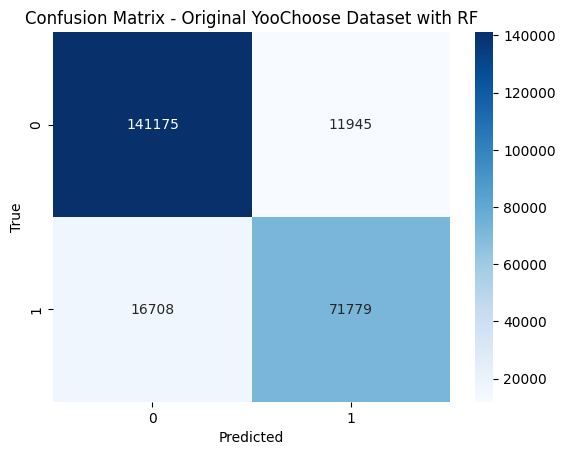

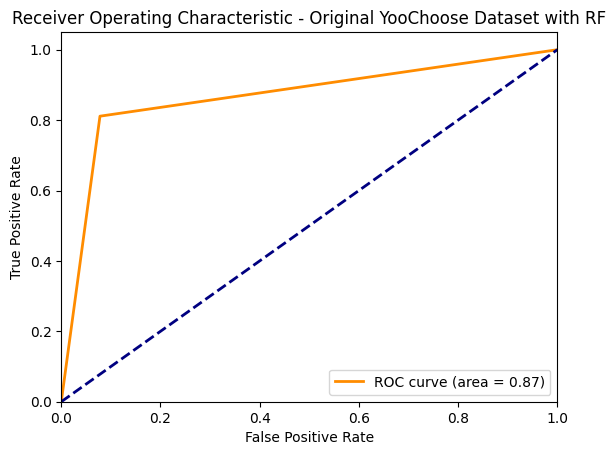

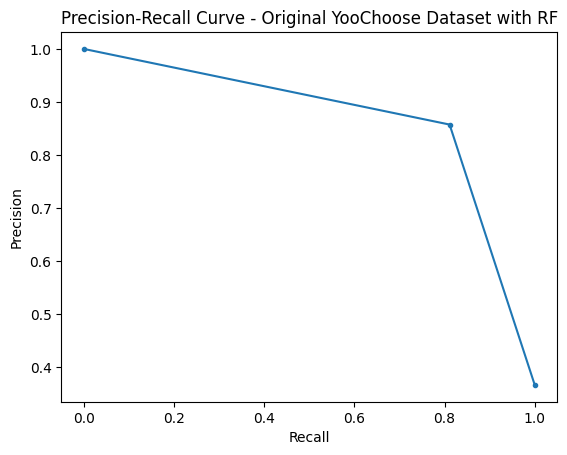

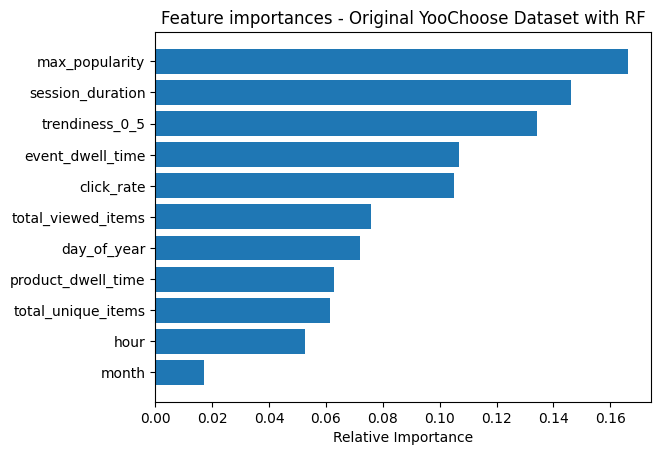

In [ ]:
auc_score_original_rf, true_session_values_rf, pred_session_values_rf = custom_calculate_auc_score(y_pred_rf, X_test, featured_test_df, 'Original YooChoose Dataset with RF')
calculate_early_predictions(y_pred_rf, X_train)

plot_confusion_matrix(true_session_values_rf, pred_session_values_rf, 'Original YooChoose Dataset with RF')
plot_roc_curve(true_session_values_rf, pred_session_values_rf, 'Original YooChoose Dataset with RF')
plot_precision_recall_curve_alternative(true_session_values_rf, pred_session_values_rf, 'Original YooChoose Dataset with RF')
plot_feature_importances(clf_rf, X_train.columns, 'Original YooChoose Dataset with RF')

    rounded_score  session_count
90       2.000000            740
62       1.670000             50
59       1.640000             25
57       1.620000             30
55       1.600000             72
52       1.570000             36
45       1.500000            203
38       1.430000             22
35       1.400000             88
33       1.380000             28
30       1.330000            350
26       1.290000             31
22       1.250000            185
17       1.200000            128
15       1.180000             23
14       1.170000             84
11       1.140000             55
9        1.120000             41
8        1.110000             32
7        1.100000             28


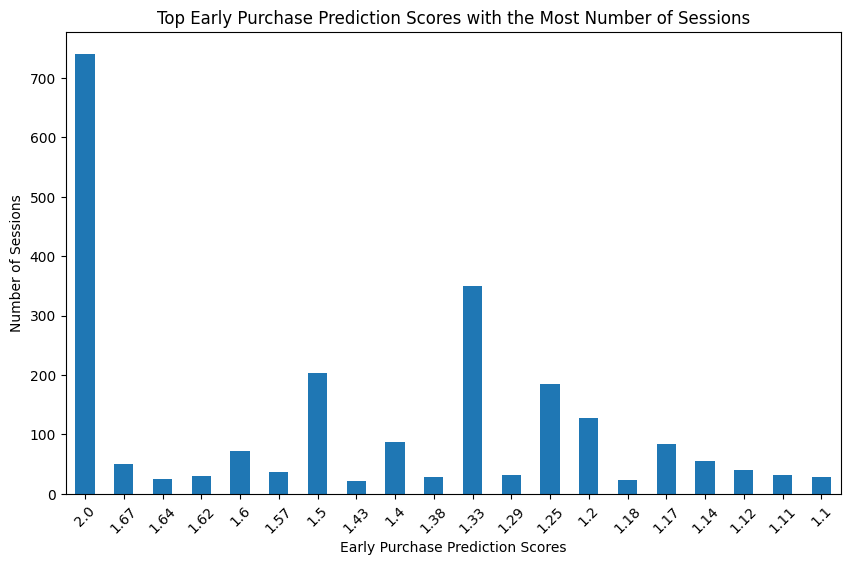

In [ ]:
plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred_rf)

In [ ]:
%%time
X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

# Create RandomForestClassifier object
clf_smt = RandomForestClassifier(n_estimators=100)
# Train RandomForestClassifier
clf_rf_smt = clf_smt.fit(X_train_smt, y_train_smt)
#Predict the response for test dataset
y_pred_smt_rf = clf_rf_smt.predict(X_test)

CPU times: user 3h 27min 45s, sys: 2min 8s, total: 3h 29min 53s
Wall time: 3h 28min 55s


Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  YooChoose Dataset Balanced using Over-Sampling with RF  : 0.8266230230582253
Index(['month', 'hour', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate',
       'max_popularity', 'product_dwell_time', 'event_dwell_time',
       'trendiness_0_5'],
      dtype='object')
11
2522 / 10000


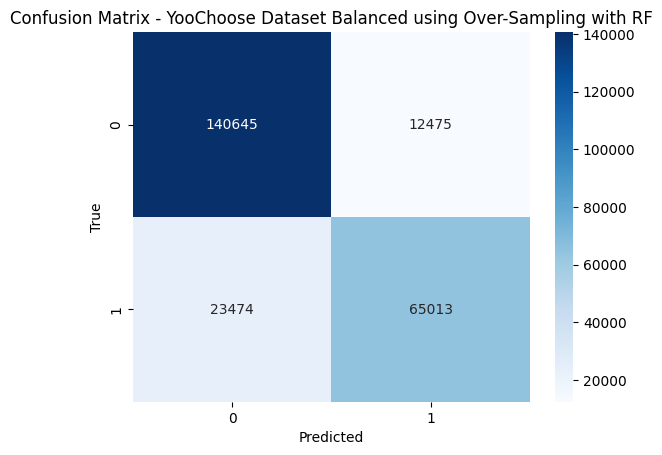

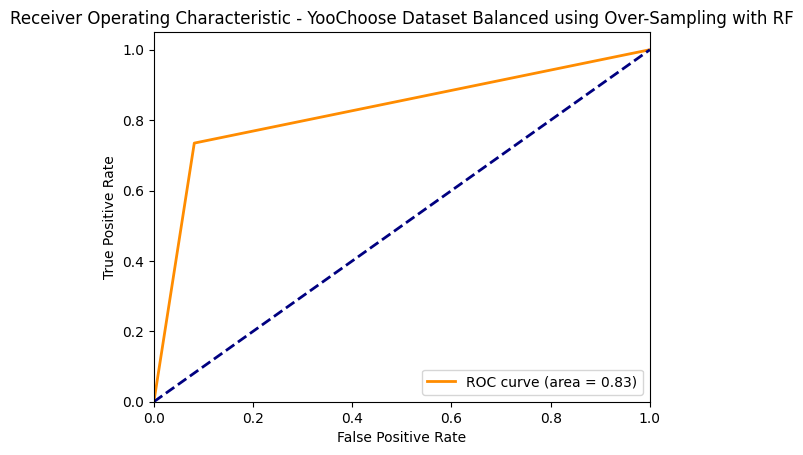

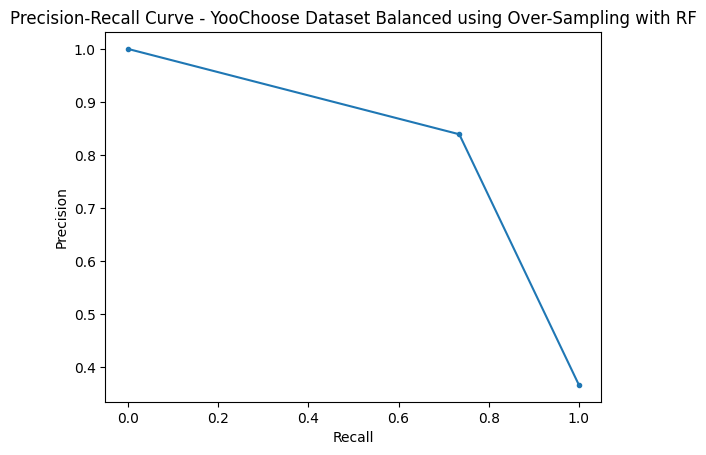

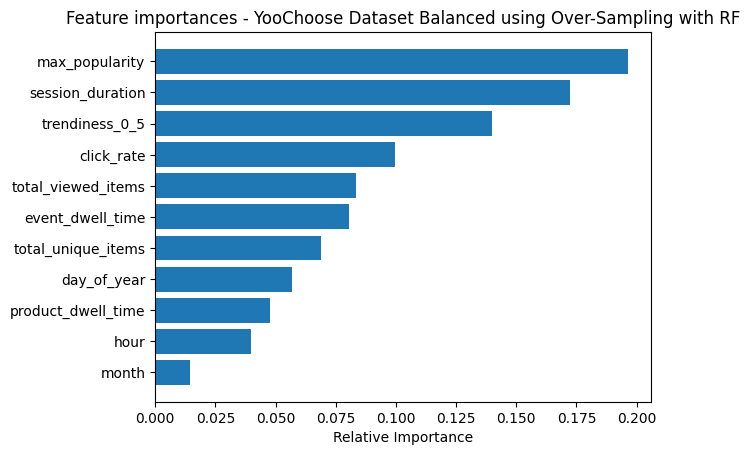

In [ ]:
auc_score_original_smt_rf, true_session_values_smt_rf, pred_session_values_smt_rf = custom_calculate_auc_score(y_pred_smt_rf, X_test, featured_test_df, 'YooChoose Dataset Balanced using Over-Sampling with RF')
calculate_early_predictions(y_pred_smt_rf, X_train)

plot_confusion_matrix(true_session_values_smt_rf, pred_session_values_smt_rf, 'YooChoose Dataset Balanced using Over-Sampling with RF')
plot_roc_curve(true_session_values_smt_rf, pred_session_values_smt_rf, 'YooChoose Dataset Balanced using Over-Sampling with RF')
plot_precision_recall_curve_alternative(true_session_values_smt_rf, pred_session_values_smt_rf, 'YooChoose Dataset Balanced using Over-Sampling with RF')
plot_feature_importances(clf_rf_smt, X_train.columns, 'YooChoose Dataset Balanced using Over-Sampling with RF')

    rounded_score  session_count
88       2.000000            657
30       1.330000            365
46       1.500000            201
22       1.250000            164
17       1.200000            112
56       1.600000             79
36       1.400000             75
14       1.170000             73
11       1.140000             53
63       1.670000             49
9        1.120000             39
26       1.290000             33
53       1.570000             33
58       1.620000             29
7        1.100000             29
70       1.750000             25
39       1.430000             25
34       1.380000             25
60       1.640000             24
19       1.220000             22


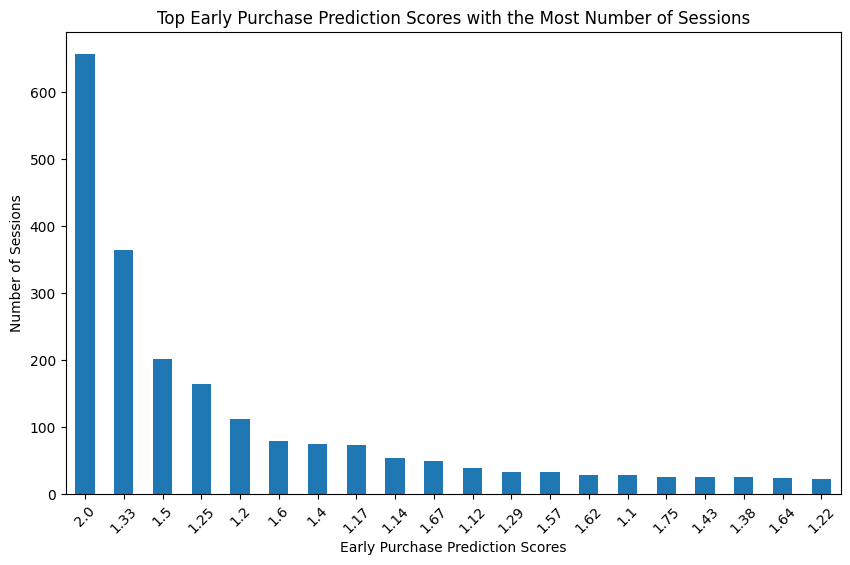

In [ ]:
plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred_smt_rf)

In [ ]:
%%time
X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

# Create RandomForestClassifier object
clf_over_and_under = RandomForestClassifier()
# Train RandomForestClassifier
clf_rf_over_and_under = clf_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)
#Predict the response for test dataset
y_pred_over_and_under_rf = clf_rf_over_and_under.predict(X_test)

CPU times: user 2h 42min 55s, sys: 1min 29s, total: 2h 44min 24s
Wall time: 2h 43min 45s


Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with RF  : 0.8427183522427105
Index(['month', 'hour', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate',
       'max_popularity', 'product_dwell_time', 'event_dwell_time',
       'trendiness_0_5'],
      dtype='object')
11
2785 / 10000


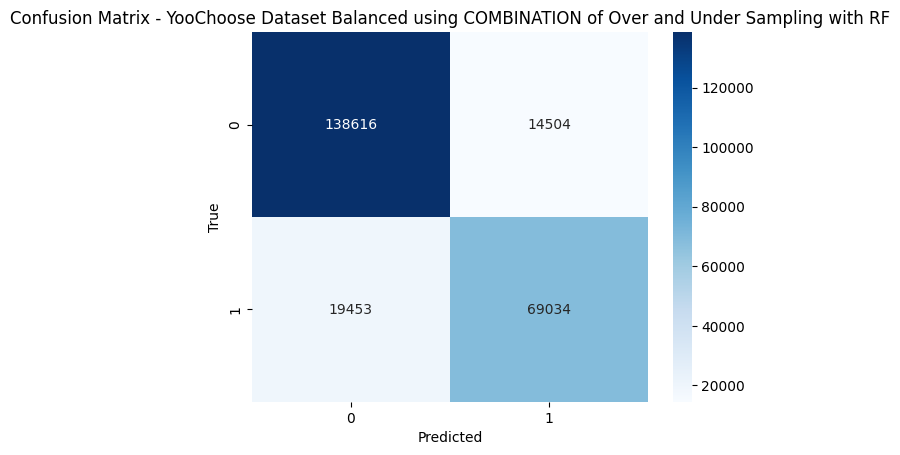

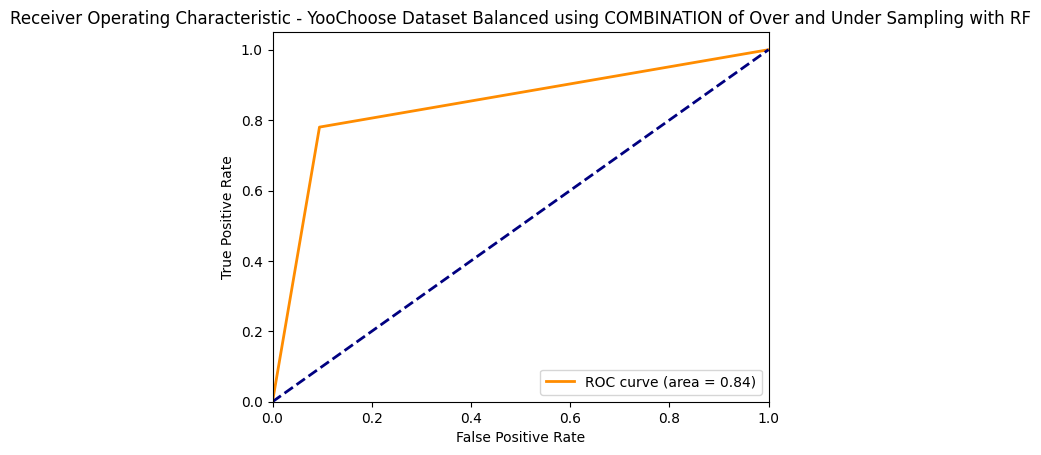

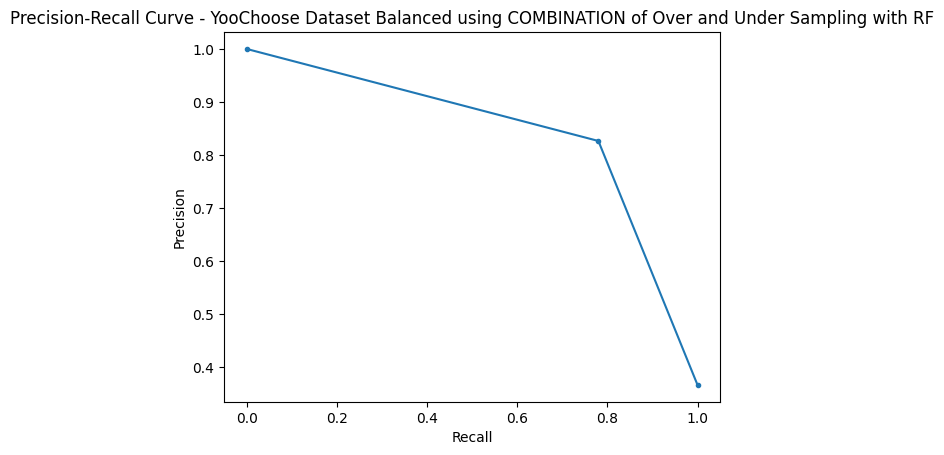

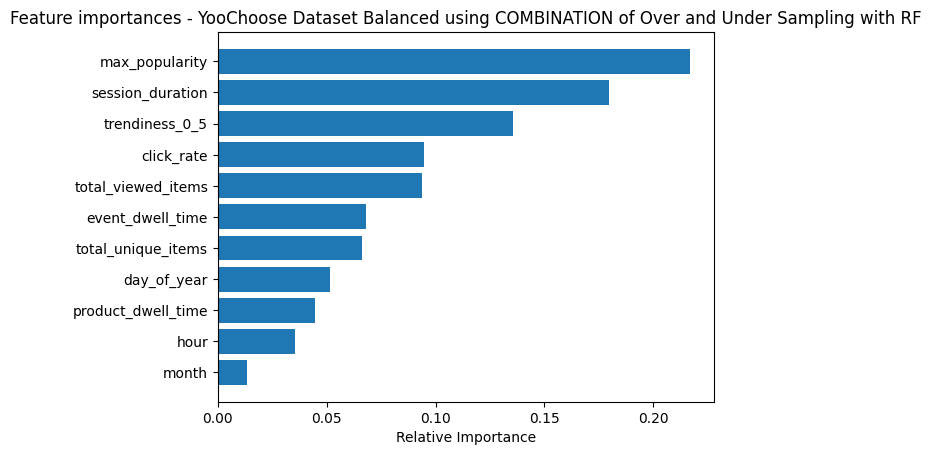

In [ ]:
auc_score_original_over_and_under_rf, true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf = custom_calculate_auc_score(y_pred_over_and_under_rf, X_test, featured_test_df, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
calculate_early_predictions(y_pred_over_and_under_rf, X_train)

plot_confusion_matrix(true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
plot_roc_curve(true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
plot_precision_recall_curve_alternative(true_session_values_over_and_under_rf, pred_session_values_over_and_under_rf, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with RF')
plot_feature_importances(clf_rf_over_and_under, X_train.columns, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with RF')

    rounded_score  session_count
88       2.000000            743
28       1.330000            412
43       1.500000            227
21       1.250000            184
16       1.200000            117
53       1.600000             95
33       1.400000             81
13       1.170000             73
60       1.670000             56
10       1.140000             53
8        1.120000             36
24       1.290000             34
50       1.570000             34
6        1.100000             28
18       1.220000             28
55       1.620000             28
68       1.750000             27
64       1.710000             26
36       1.430000             26
57       1.640000             25


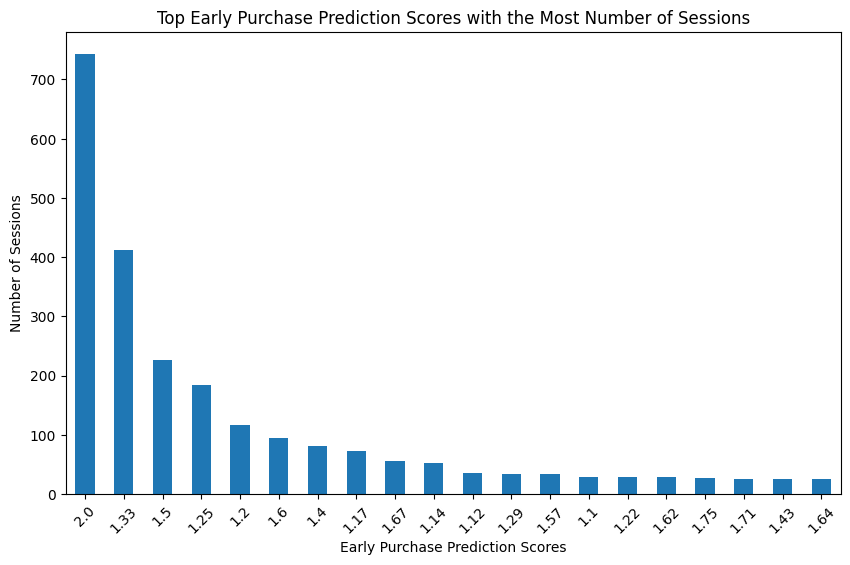

In [ ]:
plot_early_predicted_sessions_per_score(X_test, featured_test_df, y_pred_over_and_under_rf)

### 8.2. DecisionTreeClassifier:

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf_dt = clf.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

CPU times: user 6min, sys: 1.57 s, total: 6min 2s
Wall time: 6min 1s


In [ ]:
# Get feature importances
feature_importances = clf_dt.feature_importances_
print("Feature importances of ORIGINAL:", feature_importances)


# Get feature names
feature_names = X_train_smt.columns

# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)

# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])

# Display the sorted importances
print(importances_df)

Feature importances of ORIGINAL: [0.00811897 0.06134918 0.09073294 0.04565629 0.05230458 0.1420247
 0.09588044 0.22347775 0.0572869  0.07447869 0.14868957]
               Feature  Importance
0       max_popularity    0.223478
1       trendiness_0_5    0.148690
2     session_duration    0.142025
3           click_rate    0.095880
4          day_of_year    0.090733
5     event_dwell_time    0.074479
6                 hour    0.061349
7   product_dwell_time    0.057287
8   total_unique_items    0.052305
9   total_viewed_items    0.045656
10               month    0.008119


In [ ]:
print(features)
original_calculate_auc_score(y_pred_dt, 'ORIGINAL')

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.8527894905106169


In [ ]:
dt_early_predicted_sessions = count_early_predictions(y_pred_dt)
print(features)
print(dt_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
3063 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

# Train Decision Tree Classifer
clf = DecisionTreeClassifier()
clf_smt_dt = clf.fit(X_train_smt, y_train_smt)
#Predict the response for test dataset
y_pred_smt_dt = clf_smt_dt.predict(X_test)

CPU times: user 8min 9s, sys: 1.79 s, total: 8min 11s
Wall time: 8min 9s


In [ ]:
# Get feature importances
feature_importances = clf_smt_dt.feature_importances_
print("Feature importance of OVERSAMPLING:", feature_importances)


# Get feature names
feature_names = X_train_smt.columns

# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)

# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])

# Display the sorted importances
print(importances_df)

Feature importance of OVERSAMPLING: [0.00810014 0.04280045 0.0692395  0.05008452 0.05797862 0.15351122
 0.0894285  0.29881551 0.03181229 0.05007568 0.14815357]
               Feature  Importance
0       max_popularity    0.298816
1     session_duration    0.153511
2       trendiness_0_5    0.148154
3           click_rate    0.089428
4          day_of_year    0.069240
5   total_unique_items    0.057979
6   total_viewed_items    0.050085
7     event_dwell_time    0.050076
8                 hour    0.042800
9   product_dwell_time    0.031812
10               month    0.008100


In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_dt, 'OVERSAMPLING')

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  OVERSAMPLING  : 0.8409087869781249


In [ ]:
smt_dt_early_predicted_sessions = count_early_predictions(y_pred_smt_dt)
print(features)
print(smt_dt_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
3099 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

# Train Decision Tree Classifer
clf = DecisionTreeClassifier()
clf_over_and_under_dt = clf.fit(X_train_over_and_under, y_train_over_and_under)
#Predict the response for test dataset
y_pred_over_and_under_dt = clf_over_and_under_dt.predict(X_test)

CPU times: user 6min 41s, sys: 1.37 s, total: 6min 43s
Wall time: 6min 41s


Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with DT  : 0.8506486795361223
Index(['month', 'hour', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate',
       'max_popularity', 'product_dwell_time', 'event_dwell_time',
       'trendiness_0_5'],
      dtype='object')
11
3309 / 10000


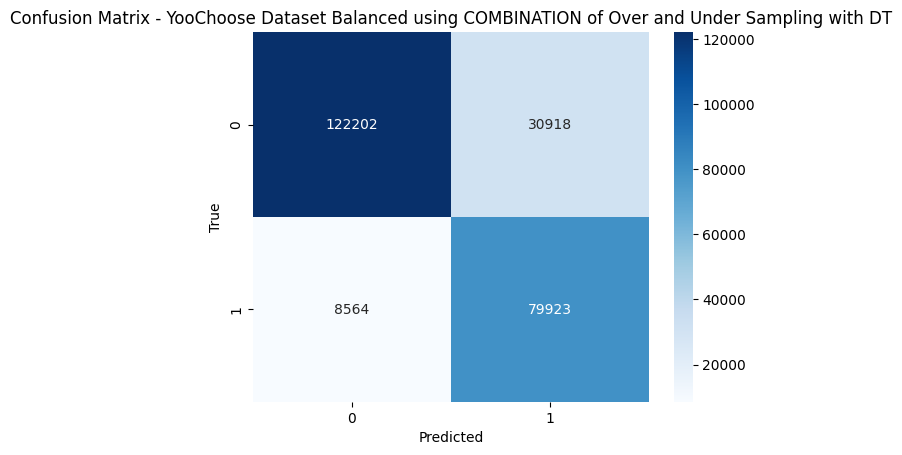

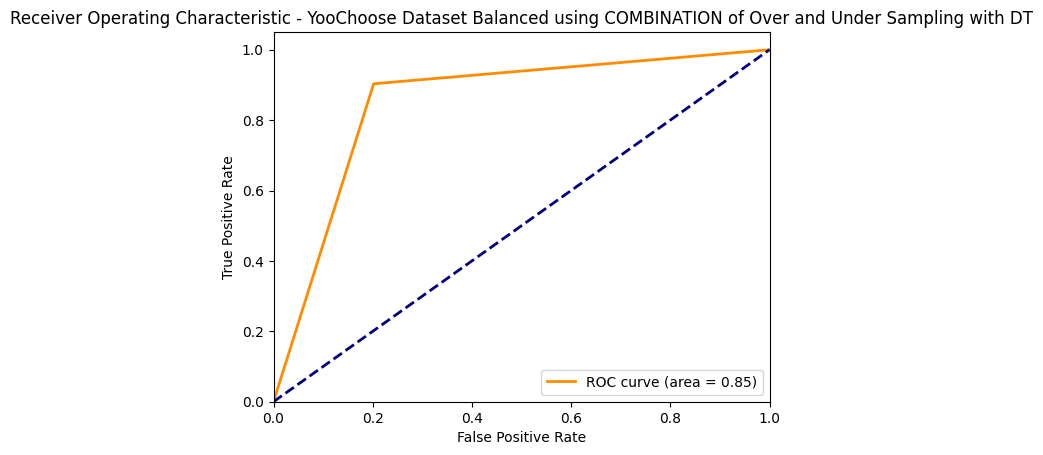

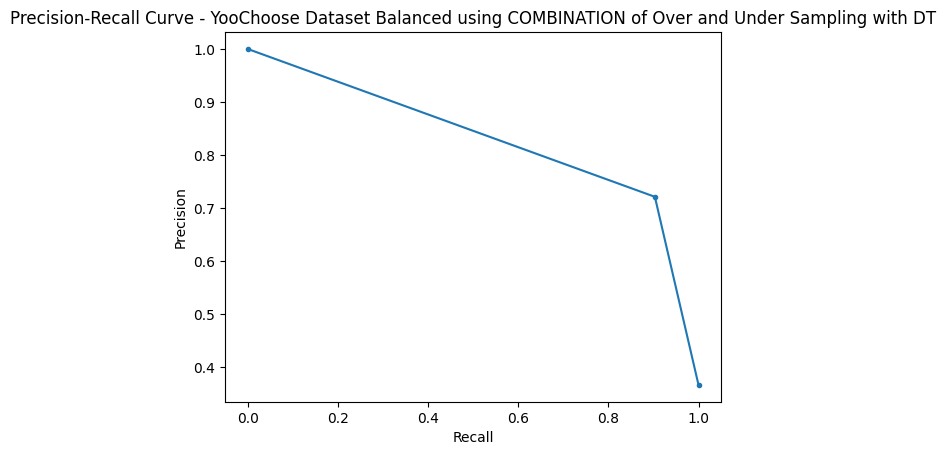

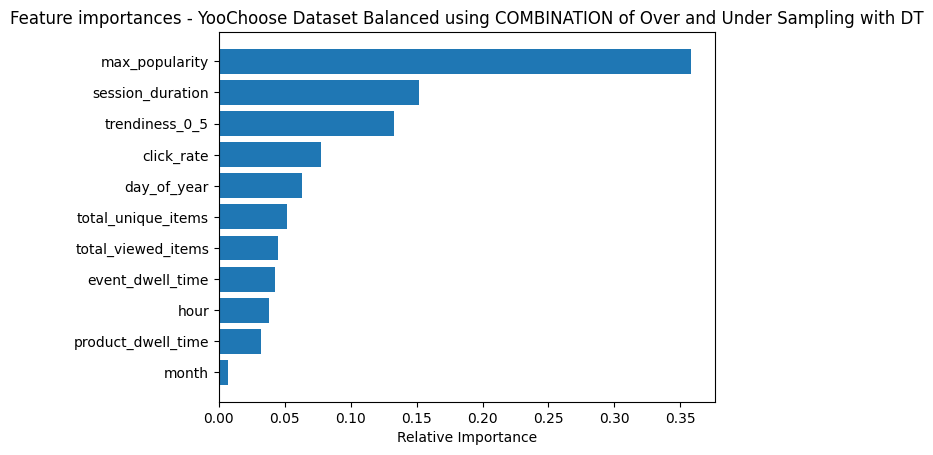

In [ ]:
auc_score_original_over_and_under_dt, true_session_values_over_and_under_dt, pred_session_values_over_and_under_dt = custom_calculate_auc_score(y_pred_over_and_under_dt, X_test, featured_test_df, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with DT')
calculate_early_predictions(y_pred_over_and_under_dt, X_train)

plot_confusion_matrix(true_session_values_over_and_under_dt, pred_session_values_over_and_under_dt, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with DT')
plot_roc_curve(true_session_values_over_and_under_dt, pred_session_values_over_and_under_dt, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with DT')
plot_precision_recall_curve_alternative(true_session_values_over_and_under_dt, pred_session_values_over_and_under_dt, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with DT')
plot_feature_importances(clf_over_and_under_dt, X_train.columns, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with DT')

In [ ]:
# Get feature importances
feature_importances = clf_over_and_under_dt.feature_importances_
print("Feature importance of COMBINATION:", feature_importances)


# Get feature names
feature_names = X_train_smt.columns

# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)

# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])

# Display the sorted importances
print(importances_df)

Feature importance of COMBINATION: [0.00718299 0.03805372 0.06304775 0.04450851 0.05181094 0.15206534
 0.07738133 0.35823672 0.03162451 0.04296653 0.13312165]
               Feature  Importance
0       max_popularity    0.358237
1     session_duration    0.152065
2       trendiness_0_5    0.133122
3           click_rate    0.077381
4          day_of_year    0.063048
5   total_unique_items    0.051811
6   total_viewed_items    0.044509
7     event_dwell_time    0.042967
8                 hour    0.038054
9   product_dwell_time    0.031625
10               month    0.007183


In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_dt, 'COMBINATION')

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  COMBINATION  : 0.8506486795361223


In [ ]:
over_and_under_dt_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_dt)
print(features)
print(over_and_under_dt_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
3309 / 10000


### 8.3. BaggingClassifier:

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=10, random_state=0)
clf_bg = model.fit(X_train, y_train)

y_pred_bg = clf_bg.predict(X_test)

CPU times: user 42min 48s, sys: 14.6 s, total: 43min 2s
Wall time: 42min 52s


In [ ]:
print(features)
original_calculate_auc_score(y_pred_bg, 'ORIGINAL')

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  ORIGINAL  : 0.8706476259776584


In [ ]:
bagging_early_predicted_sessions = count_early_predictions(y_pred_bg)
print(features)
print(bagging_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
2810 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=10, random_state=0)
clf_smt_bg = model.fit(X_train_smt, y_train_smt)

y_pred_smt_bg = clf_smt_bg.predict(X_test)

CPU times: user 57min 6s, sys: 16.5 s, total: 57min 22s
Wall time: 57min 9s


In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in clf_smt_bg.estimators_
], axis=0)


# Get feature names
feature_names = X_train_smt.columns
# Pair each feature name with its importance
feature_importance_pairs = zip(feature_names, feature_importances)
# Convert to a list and sort by importance
sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
# Convert to DataFrame for nicer display
importances_df = pd.DataFrame(sorted_feature_importances, columns=['Feature', 'Importance'])
# Display the sorted importances
print(importances_df)

               Feature  Importance
0       max_popularity    0.298696
1       trendiness_0_5    0.150842
2     session_duration    0.148972
3           click_rate    0.084950
4          day_of_year    0.066433
5   total_unique_items    0.057769
6     event_dwell_time    0.055966
7   total_viewed_items    0.049717
8                 hour    0.041392
9   product_dwell_time    0.037261
10               month    0.008002


In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_bg, 'OVERSAMPLING')

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  OVERSAMPLING  : 0.8491395164868983


In [ ]:
smt_bagging_early_predicted_sessions = count_early_predictions(y_pred_smt_bg)
print(features)
print(smt_bagging_early_predicted_sessions, '/', number_of_test_purchased_sessions)

['purchase', 'month', 'hour', 'day_of_year', 'total_viewed_items', 'total_unique_items', 'session_duration', 'click_rate', 'max_popularity', 'product_dwell_time', 'event_dwell_time', 'trendiness_0_5']
2604 / 10000


In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

# Create the base classifier
dc = DecisionTreeClassifier()
model = BaggingClassifier(n_estimators=10, random_state=0)
clf_over_and_under_bg = model.fit(X_train_over_and_under, y_train_over_and_under)
y_pred_over_and_under_bg = clf_over_and_under_bg.predict(X_test)

CPU times: user 46min 26s, sys: 11.8 s, total: 46min 38s
Wall time: 46min 27s


Evaluate model on each event prediction (converting non-purchase event to purchase one if it belongs to a purchase session):
(non-purchase events: 153120 , purchase events: 88487 )
ROC AUC DecisionTreeClassifier  YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with Bagging  : 0.858160230588217
Index(['month', 'hour', 'day_of_year', 'total_viewed_items',
       'total_unique_items', 'session_duration', 'click_rate',
       'max_popularity', 'product_dwell_time', 'event_dwell_time',
       'trendiness_0_5'],
      dtype='object')
11
2833 / 10000


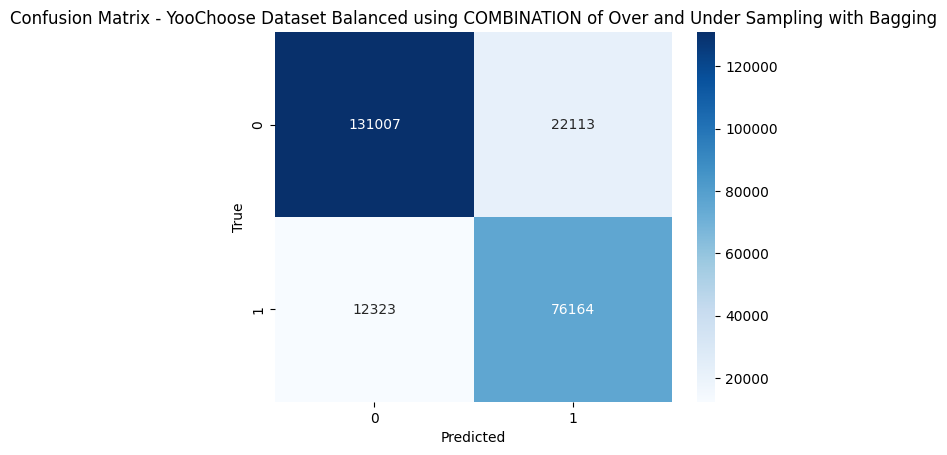

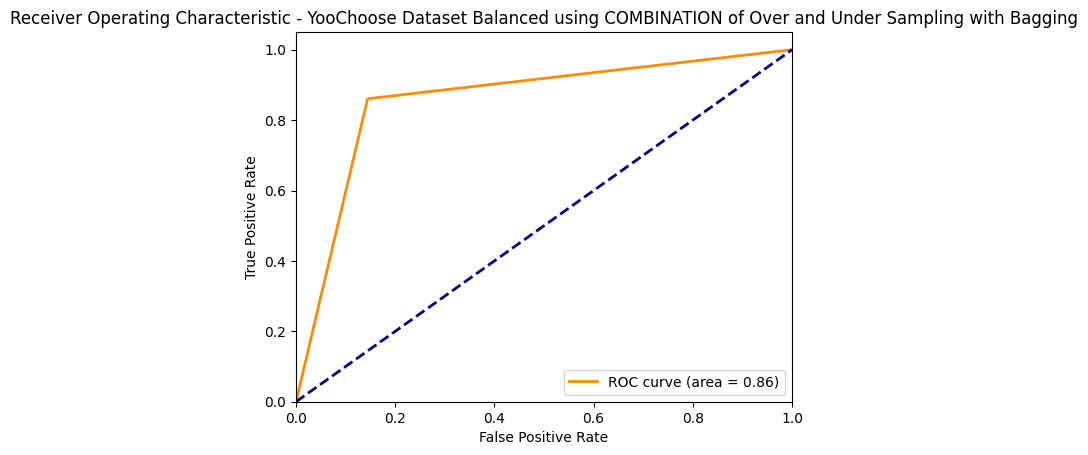

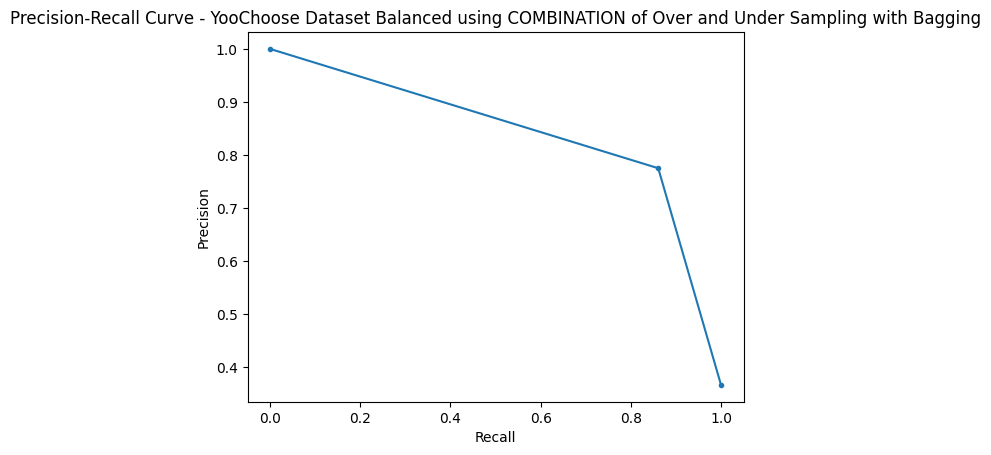

AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

In [ ]:
auc_score_original_over_and_under_bg, true_session_values_over_and_under_bg, pred_session_values_over_and_under_bg = custom_calculate_auc_score(y_pred_over_and_under_bg, X_test, featured_test_df, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with Bagging')
calculate_early_predictions(y_pred_over_and_under_bg, X_train)

plot_confusion_matrix(true_session_values_over_and_under_bg, pred_session_values_over_and_under_bg, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with Bagging')
plot_roc_curve(true_session_values_over_and_under_bg, pred_session_values_over_and_under_bg, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with Bagging')
plot_precision_recall_curve_alternative(true_session_values_over_and_under_bg, pred_session_values_over_and_under_bg, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with Bagging')
plot_feature_importances(clf_over_and_under_bg, X_train.columns, 'YooChoose Dataset Balanced using COMBINATION of Over and Under Sampling with Bagging')

In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_bg, 'COMBINATION')

In [ ]:
print(features)
over_and_under_bagging_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_bg)
print(over_and_under_bagging_early_predicted_sessions, '/', number_of_test_purchased_sessions)

### 8.4. KNeighborsClassifier:

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [ ]:
print(features)
original_calculate_auc_score(y_pred_knn, 'ORIGINAL')

In [ ]:
knn_early_predicted_sessions = count_early_predictions(y_pred_knn)
print(features)
print(knn_early_predicted_sessions, '/', number_of_test_purchased_sessions)

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

knn_smt = KNeighborsClassifier(n_neighbors=3)
knn_smt.fit(X_train_smt, y_train_smt)

y_pred_smt_knn = knn_smt.predict(X_test)

In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_knn, 'ORIGINAL')

In [ ]:
smt_knn_early_predicted_sessions = count_early_predictions(y_pred_smt_knn)
print(features)
print(smt_knn_early_predicted_sessions, '/', number_of_test_purchased_sessions)

In [ ]:
%%time

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

knn_over_and_under = KNeighborsClassifier(n_neighbors=3)
knn_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)

y_pred_over_and_under_knn = knn_over_and_under.predict(X_test)

In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_knn, 'ORIGINAL')

In [ ]:
over_and_under_knn_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_knn)
print(features)
print(over_and_under_knn_early_predicted_sessions, '/', number_of_test_purchased_sessions)

### 8.5. Gaussian Naive Bayes:

In [ ]:
%%time

from sklearn.naive_bayes import GaussianNB

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train.columns
X_test = X_test[train_columns]

model = GaussianNB()
model.fit(X_train, y_train)

y_pred_nb = model.predict(X_test)

In [ ]:
print(features)
original_calculate_auc_score(y_pred_nb, 'ORIGINAL')

In [ ]:
nb_early_predicted_sessions = count_early_predictions(y_pred_nb)
print(features)
print(nb_early_predicted_sessions, '/', number_of_test_purchased_sessions)

In [ ]:
%%time

from sklearn.naive_bayes import GaussianNB

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_smt.columns
X_test = X_test[train_columns]

model_smt = GaussianNB()
model_smt.fit(X_train_smt, y_train_smt)

y_pred_smt_nb = model_smt.predict(X_test)

In [ ]:
print(features)
original_calculate_auc_score(y_pred_smt_nb, 'OVERSAMPLING')

In [ ]:
smt_nb_early_predicted_sessions = count_early_predictions(y_pred_smt_nb)
print(features)
print(smt_nb_early_predicted_sessions, '/', number_of_test_purchased_sessions)

In [ ]:
%%time

from sklearn.naive_bayes import GaussianNB

X_test = X_test.drop(columns=columns_to_remove, errors='ignore')
train_columns = X_train_over_and_under.columns
X_test = X_test[train_columns]

model_over_and_under = GaussianNB()
model_over_and_under.fit(X_train_over_and_under, y_train_over_and_under)

y_pred_over_and_under_nb = model_over_and_under.predict(X_test)

In [ ]:
print(features)
original_calculate_auc_score(y_pred_over_and_under_nb, 'COMBINATION')

In [ ]:
over_and_under_nb_early_predicted_sessions = count_early_predictions(y_pred_over_and_under_nb)
print(features)
print(over_and_under_nb_early_predicted_sessions, '/', number_of_test_purchased_sessions)